In [17]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl

# define semesta

In [18]:
harga= ctrl.Antecedent(np.arange(0, 51, 1), 'Harga Produk')
persediaan= ctrl.Antecedent(np.arange(0, 71, 1), 'Persediaan Produk')
permintaan= ctrl.Consequent(np.arange(0, 91, 1), 'Permintaan Produk')

# membership function

In [19]:
harga ['murah'] = fuzz.trimf(harga.universe, [0, 7.5, 15])
harga ['sedang'] = fuzz.trimf(harga.universe, [11, 19, 27])
harga ['mahal'] = fuzz.trimf(harga.universe, [28, 39, 50])

In [20]:
persediaan ['terbatas'] = fuzz.trimf(persediaan.universe, [0, 10, 20])
persediaan ['cukup'] = fuzz.trimf(persediaan.universe, [15, 32.5, 50])
persediaan ['melimpah'] = fuzz.trimf(persediaan.universe, [40, 55, 70])

In [21]:
permintaan ['rendah'] = fuzz.trimf(permintaan.universe, [0, 14, 28])
permintaan ['sedang'] = fuzz.trimf(permintaan.universe, [20, 34, 48])
permintaan ['tinggi'] = fuzz.trimf(permintaan.universe, [40, 65, 90])

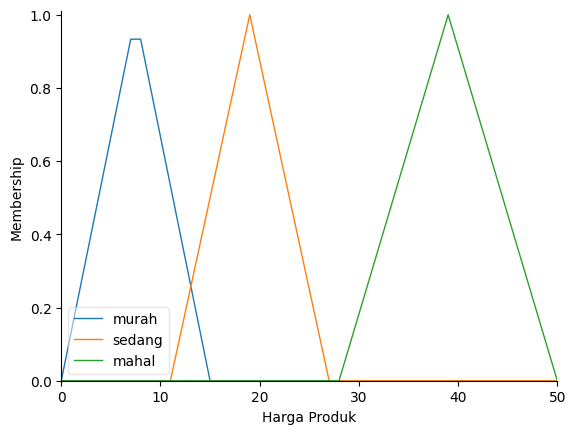

In [22]:
harga.view()

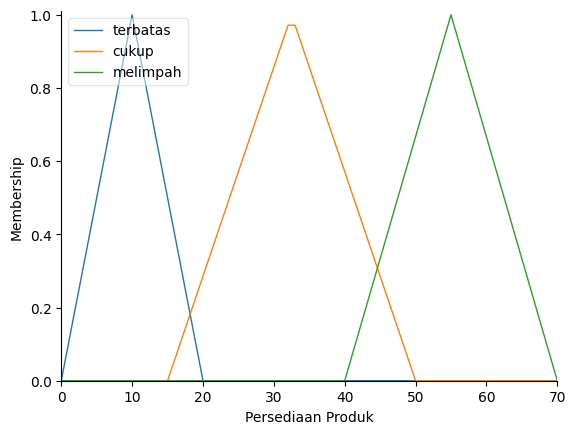

In [23]:
persediaan.view()

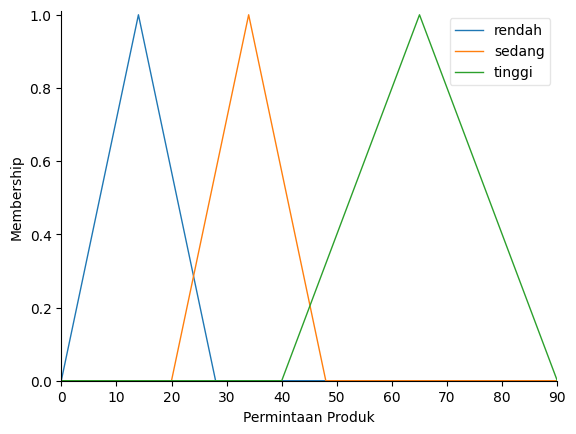

In [24]:
permintaan.view()

# define rule

In [25]:
rule1 = ctrl.Rule(harga['mahal'] & persediaan['terbatas'], permintaan['sedang'])
rule2 = ctrl.Rule(harga['mahal'] & persediaan['melimpah'], permintaan['rendah'])
rule3 = ctrl.Rule(harga['murah'] & persediaan['terbatas'], permintaan['tinggi'])
rule4 = ctrl.Rule(harga['murah'] & persediaan['cukup'], permintaan['sedang'])

In [26]:
produk_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4])

In [27]:
permintaan_produk = ctrl.ControlSystemSimulation(produk_ctrl)

In [28]:
permintaan_produk.input['Harga Produk'] = 35
permintaan_produk.input['Persediaan Produk'] = 50
permintaan_produk.compute()

13.999999999999995


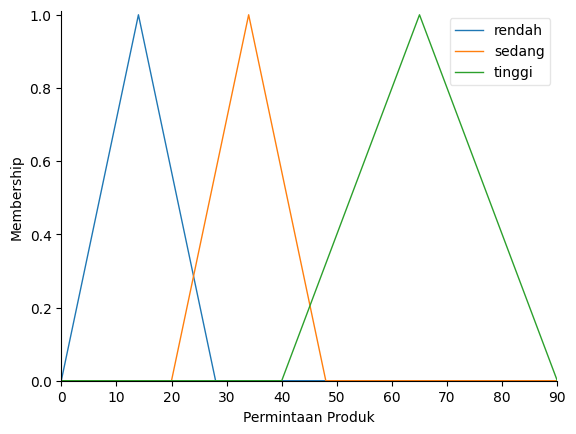

In [29]:
print(permintaan_produk.output['Permintaan Produk'])
permintaan.view(Sim=permintaan_produk)

# Mata Kuliah: Kecerdasan Buatan D081
Kelompok 12 :
1. Fidela Carissa A (21081010104)
2. Mutiara Fadhilatuzzahro (21081010205)
3. Acaya Fazrin (12081010236)